In [1]:
#E-commerce b2b case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  

from sklearn.tree import export_graphviz
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold


In [6]:
open_invoice = pd.read_csv("Open_Invoice_data.csv",encoding='cp1252')
open_invoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [8]:
open_invoice.shape

(88204, 14)

In [9]:
open_invoice.describe()

,Customer Account No,AGE
count,88201.000000,88204.000000
mean,21911.718291,183.430706
std,17427.778620,368.123334
min,1044.000000,-359.000000
25%,3925.000000,-17.000000
50%,20998.000000,47.000000
75%,35066.000000,242.000000
max,55049.000000,7343.000000


In [10]:
repayment_invoice = pd.read_csv("Received_Payments_Data.csv",encoding='cp1252')
repayment_invoice.head()

,ï»¿RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [11]:
repayment_invoice.shape

(93937, 16)

In [13]:
repayment_invoice.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [33]:
#change the date formats of RECEIPT_DATE 
repayment_invoice['RECEIPT_DATE']=pd.to_datetime(repayment_invoice['RECEIPT_DATE'])
repayment_invoice['RECEIPT_DATE']=repayment_invoice['RECEIPT_DATE'].dt.strftime('%Y-%m-%d')

In [34]:
repayment_invoice['RECEIPT_DATE']

0        2021-04-20
1        2021-01-31
2        2021-01-31
3        2021-01-31
4        2021-01-31
            ...    
93932    2021-04-01
93933    2021-04-01
93934    2021-04-01
93935    2021-04-01
93936    2021-04-08
Name: RECEIPT_DATE, Length: 93937, dtype: object

In [35]:
#change the date formats of DUE_DATE 
repayment_invoice['DUE_DATE']=pd.to_datetime(repayment_invoice['DUE_DATE'])
repayment_invoice['DUE_DATE']=repayment_invoice['DUE_DATE'].dt.strftime('%Y-%m-%d')

In [36]:
repayment_invoice['DUE_DATE']

0        2020-12-30
1        2021-01-28
2        2021-03-01
3        2021-01-14
4        2021-01-14
            ...    
93932    2020-12-28
93933    2020-12-28
93934    2020-12-28
93935    2021-03-24
93936    2021-03-30
Name: DUE_DATE, Length: 93937, dtype: object

In [37]:
#dervive whether a customer has delyaed the payment or not
repayment_invoice.loc[repayment_invoice['RECEIPT_DATE'] > repayment_invoice['DUE_DATE'], 'default'] = 1
repayment_invoice.loc[repayment_invoice['RECEIPT_DATE'] < repayment_invoice['DUE_DATE'], 'default'] = 0

In [38]:
repayment_invoice

,ï»¿RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1.0
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1.0
2,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0.0
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1.0
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,NaN,2021-04-01,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,2020-12-28,Immediate,CM,USD,Goods,1.0
93933,WIRE,PEAR Corp,21144,NaN,2021-04-01,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,2020-12-28,Immediate,CM,USD,Goods,1.0
93934,WIRE,PEAR Corp,21144,NaN,2021-04-01,PMT,USD,59914.50,59914.50000,2.842E+11,28-Dec-20,2020-12-28,Immediate,CM,USD,Goods,1.0
93935,WIRE,NAMS Corp,21145,NaN,2021-04-01,PMT,AED,23574.33,23574.33000,2.842E+11,24-Jan-21,2021-03-24,60 Days from Inv Date,INV,AED,Goods,1.0


In [41]:
open_invoice.rename(columns = {'Customer Account No':'CUSTOMER_NUMBER'},inplace=True)
open_invoice

,AS_OF_DATE,Customer Type,Customer_Name,CUSTOMER_NUMBER,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88199,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000125,01/08/2021,Immediate,01/08/2021,USD,"-1,199",CREDIT NOTE,247,"-1,199",8/1/2021 15:33
88200,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000126,01/08/2021,Immediate,01/08/2021,USD,-914,CREDIT NOTE,247,-914,8/1/2021 15:33
88201,04-APR-2022 01:07:01,Related Party,MCT Corp,1825.0,165220000011,20/01/2022,30 Days from EOM,28/02/2022,AED,"12,866",INVOICE,36,"12,866",1/20/2022 10:41
88202,04-APR-2022 01:07:01,Related Party,QATA Corp,2273.0,165220000007,18/01/2022,60 Days from Inv Date,19/03/2022,USD,"18,118",INVOICE,17,"18,118",1/18/2022 9:51


In [45]:
#due to memory issue have taken starting 3000 data
new_mrege_data=pd.merge(open_invoice[0:3000],repayment_invoice[0:3000],how='inner',on='CUSTOMER_NUMBER')

In [46]:
new_mrege_data

,AS_OF_DATE,Customer Type,Customer_Name,CUSTOMER_NUMBER,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount_x,...,Local Amount_y,USD Amount_y,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",...,6448.74,6448.74000,1.002E+11,23-Dec-20,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0.0
1,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",...,6448.74,6448.74000,1.002E+11,23-Dec-20,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0.0
2,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",...,6448.74,6448.74000,1.002E+11,23-Dec-20,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0.0
3,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",...,6448.74,6448.74000,1.002E+11,23-Dec-20,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0.0
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",...,363556.30,363556.30000,1.0021E+11,2-Feb-21,2021-03-30,30 Days from EOM,INV,AED,Non Goods,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735665,04-APR-2022 01:07:01,3rd Party,SPEC Corp,41360.0,103210014947,05/06/2021,60 Days from Inv Date,04/08/2021,SAR,0,...,429180.00,114425.13690,1.0121E+11,10-Mar-21,2021-04-15,15 Days from EOM,INV,SAR,Goods,0.0
1735666,04-APR-2022 01:07:01,3rd Party,SPEC Corp,41360.0,103210014947,05/06/2021,60 Days from Inv Date,04/08/2021,SAR,0,...,429180.00,114425.13690,1.0121E+11,8-Mar-21,2021-04-15,15 Days from EOM,INV,SAR,Goods,0.0
1735667,04-APR-2022 01:07:01,3rd Party,SPEC Corp,41360.0,103210014947,05/06/2021,60 Days from Inv Date,04/08/2021,SAR,0,...,429180.00,114425.13690,1.0121E+11,18-Mar-21,2021-04-15,15 Days from EOM,INV,SAR,Goods,0.0
1735668,04-APR-2022 01:07:01,3rd Party,SPEC Corp,41360.0,103210014947,05/06/2021,60 Days from Inv Date,04/08/2021,SAR,0,...,68482.50,18258.35182,1.0121E+11,18-Mar-21,2021-04-15,15 Days from EOM,INV,SAR,Goods,0.0


Text(0, 0.5, 'frquency')

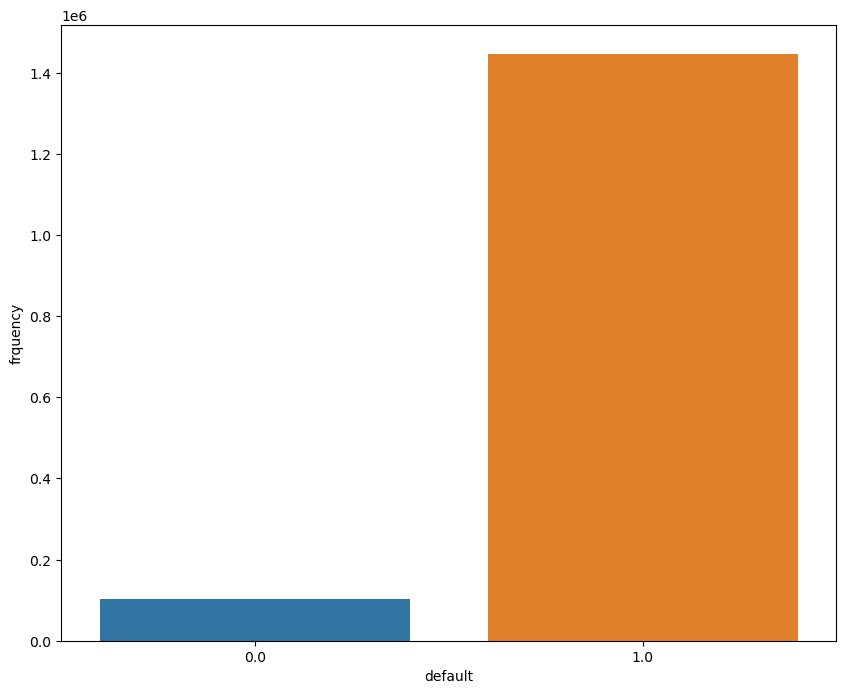

In [48]:
fig = plt.figure(figsize = (10,8))
sns.countplot(new_mrege_data["default"])
plt.ylabel('frquency')   


In [49]:
## it can be seen from the diagram that number of customer who delayed the payment are more


In [50]:
new_mrege_data['new_invoice_type']=[1 if x=='Goods' else 0 for x in new_mrege_data['INVOICE_TYPE']]

In [52]:
new_mrege_data['new_customer_type']=[1 if x=='Related Party' else 0 for x in new_mrege_data['Customer Type']]


In [61]:
final_data_set=new_mrege_data[['default','new_invoice_type','new_customer_type','AGE','USD Amount_y','Local Amount_y']]

In [62]:
final_data_set

,default,new_invoice_type,new_customer_type,AGE,USD Amount_y,Local Amount_y
0,0.0,0,1,-25,6448.74000,6448.74
1,0.0,0,1,-25,6448.74000,6448.74
2,0.0,0,1,-25,6448.74000,6448.74
3,0.0,0,1,-25,6448.74000,6448.74
4,0.0,0,1,-25,363556.30000,363556.30
...,...,...,...,...,...,...
1735665,0.0,1,0,244,114425.13690,429180.00
1735666,0.0,1,0,244,114425.13690,429180.00
1735667,0.0,1,0,244,114425.13690,429180.00
1735668,0.0,1,0,244,18258.35182,68482.50


In [63]:
#split train and test data
from sklearn.model_selection import train_test_split

In [74]:
final_data_set=final_data_set.fillna(0)
X = final_data_set.drop(['default'], 1)
y = final_data_set['default']


In [84]:
# Split thedata into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
X_train


,new_invoice_type,new_customer_type,AGE,USD Amount_y,Local Amount_y
1108158,1,1,104,135146.1246,506899.23
757487,1,1,-38,293141.3158,1099499.58
408996,1,1,-40,261736.8947,981709.47
1375379,1,1,32,497111.1556,1864539.31
1499500,1,1,31,293141.3158,1099499.58
...,...,...,...,...,...
1154171,1,1,99,135146.1246,506899.23
617841,1,1,-40,497111.1556,1864539.31
1492288,1,1,31,261736.8947,981709.47
1048548,1,1,50,135146.1246,506899.23


In [85]:
logreg = LogisticRegression()


In [86]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:              1214969
Model:                            GLM   Df Residuals:                  1214963
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9251e+05
Date:                Tue, 20 Feb 2024   Deviance:                   9.8311e+05
Time:                        02:06:09   Pearson chi2:                 2.52e+17
No. Iterations:                    23   Pseudo R-squ. (CS):            0.08605
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4312      0.044     32.833      0.000       1.346       1.517
new_invoice_type      1.3777      0.032     43.531      0.000       1.316       1.440
new_customer_type    -1.0922      0.031    -35.621      0.000      -1.152      -1.032
AGE                   0.0015   4.38e-05     33.885      0.000       0.001       0.002
USD Amount_y         -0.0014    2.6e-05    -53.292      0.000      -0.001      -0.001
Local Amount_y        0.0004   6.92e-06     53.298      0.000       0.000       0.000
=====================================================================================
"""

In [79]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:              1214969
Model:                            GLM   Df Residuals:                  1214963
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9251e+05
Date:                Tue, 20 Feb 2024   Deviance:                   9.8311e+05
Time:                        02:03:33   Pearson chi2:                 2.52e+17
No. Iterations:                    13   Pseudo R-squ. (CS):            0.08605
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9728      0.041     23.729      0.000       0.892       1.053
x1             1.3777      0.032     43.531      0.000       1.316       1.440
x2            -1.0922      0.031    -35.621      0.000      -1.152      -1.032
x3             3.3221      0.098     33.885      0.000       3.130       3.514
x4          -737.2679     13.834    -53.292      0.000    -764.383    -710.153
x5           737.6677     13.840     53.298      0.000     710.541     764.795
==============================================================================
"""

In [88]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,USD Amount_y,1331.64
4,Local Amount_y,1323.62
0,new_invoice_type,28.14
1,new_customer_type,27.91
2,AGE,1.04


In [94]:
X_train=X_train.drop('USD Amount_y',axis=1)

In [95]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,new_invoice_type,22.36
1,new_customer_type,21.19
3,Local Amount_y,5.20
2,AGE,1.03


In [96]:
X_train=X_train.drop('new_customer_type',axis=1)

In [97]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,new_invoice_type,5.09
2,Local Amount_y,5.05
1,AGE,1.02


In [98]:

##test prediction
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)


In [99]:
y_train_pred_final = pd.DataFrame({'default':y_train, 'prob-default':y_train_pred})
y_train_pred_final.head()


,default,prob-default
1108158,1.0,0.868601
757487,0.0,0.845307
408996,1.0,0.844384
1375379,1.0,0.861603
1499500,0.0,0.858237


In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final['prob-default'].map(lambda x: 1 if x > 0.5 else 0)


In [102]:
y_train_pred_final

,default,prob-default,Predicted
1108158,1.0,0.868601,1
757487,0.0,0.845307,1
408996,1.0,0.844384,1
1375379,1.0,0.861603,1
1499500,0.0,0.858237,1
...,...,...,...
1154171,1.0,0.867751,1
617841,1.0,0.848353,1
1492288,1.0,0.857741,1
1048548,1.0,0.859174,1


In [104]:
#evaluation:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final['default'], y_train_pred_final.Predicted)



0.859830168506357

In [ ]:
##acuuracy of given model is 85% 

